# <center>Aplicación de CNN para reconocimiento de Pokémon y generación de una interfaz explicativa</center>


## Datos Generales.

* Asignatura: Inteligencia Artificial en las Organizaciones
* Curso: 2023/2024
* Profesor: Agapito Ismael Ledezma Espino
* Grupo: 85

Alumnos: 
- Jonathan Jiménez Muñoz (100451132@alumnos.uc3m.es)
- Marta Palomo Velasco (100451041@alumnos.uc3m.es)
- Francisco Antonio Gallardo Fuentes (100451146@alumnos.uc3m.es)
- Yago Brotón Gutiérrez (100451322@alumnos.uc3m.es)

## Introducción

El objetivo de está práctica va a ser utilizar Redes Neuronales Convolucionales para clasificar imágenes de Pokémon y, una vez identificado dicho Pokémon, construir una pequeña interfaz donde se muestren estadísticas relevantes sobre el mismo. 

## Contexto

Cada año salen más y más Pokemon, habiendo actualmente más de 1000 especies diferentes, donde cada especie tiene n movimientos diferentes, 2/3 habilidades diferentes, naturalezas, tipos, etc. <br><br>
Es por ello que las personas junior que intentan competir profesionalmente en el juego de Pokemon, se ven abrumadas por la cantidad de información que tienen que procesar, y por ello cada vez hay más y más jugadores masters (+18 años) y menos senior y junior (menos de 18 años), dado que los jugadores que antes eran junior han cambiado de categoría y cada vez hay menos jugadores nuevos que se unan a la comunidad. <br><br>
Con esta práctica lo que queremos lograr es que, a partir de una simple imagen de un Pokemon, se muestre información relevante sobre el mismo, como por ejemplo, sus estadísticas base, sus habilidades, sus movimientos, etc, y con ello que los jugadores junior puedan aprender más rápido y tener algo más de motivación para entrar en la comunidad competitiva de Pokemon.

## Desarrollo de la práctica

Esta práctica va a estar dividida en varias fases:

1. Obtención de los datos: En esta fase vamos a obtener aquellas imágenes que vamos a utilizar para entrenar nuestro modelo, y vamos a preprocesarlas para que el modelo pueda entrenar con ellas. Además de obtener los datos usados para la interfaz. <br><br>
2. Preprocesado de los datos: Una vez obtengamos todos los datos/imágenes posibles, tendremos que hacer una limpieza (eliminar duplicados, imágenes que no correspondan al Pokemon que queremos, etc), con el objetivo de tener un dataset lo más limpio posible.<br><br>
3. División train_test y últimas preparaciones para el modelo: Tras haber preprocesado los datos, el siguiente paso es dividir el dataset en train y test, y realizar las últimas preparaciones para el modelo (generación de más imágenes, etc).<br><br>
4. Construcción del modelo: Una vez tenemos los datos preparados, el siguiente paso es construir el modelo. Para ello, vamos a utilizar una red neuronal convolucional CNN, que es un tipo de red neuronal que se utiliza para clasificar imágenes. <br><br>
5. Desarrollo de la Interfaz: Finalmente, con el modelo ya entrenado y seleccionado, tendremos que desarrollar una interfaz que muestre aquella información (mejores movimientos, habilidades, estadísticas, etc) que consideremos relevantes para el jugador y que le ayuden a mejorar en el juego.

### 1. Obtención de los datos

Para obtener las imágenes y datos sobre los Pokémon, hemos utilizado diferentes fuentes de información, como por ejemplo:
Kaggle: 
- https://www.kaggle.com/datasets/abcsds/pokemon
- https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types
- https://www.kaggle.com/datasets/kvpratama/pokemon-images-dataset
- https://www.kaggle.com/datasets/arenagrenade/the-complete-pokemon-images-data-set

ImagenDex:
- https://pokemaster.es/imagendex/

Una vez hemos obtenido imágenes de todos los Pokémon, el próximo objetivo es escoger aquellos que más imágenes tenemos y a partir de ahí, obtener más imágenes de los mismos. <br>

Para ello decidimos crear un pequeño script que nos permitiera obtener imágenes a partir de Google Imágenes. <br>

En dicho script utilizamos las librerías: google_search, para realizar búsquedas en Google Imágenes; requests, para realizar peticiones a las páginas web y BeautifulSoup para parsear el HTML de las páginas web y obtener las imágenes. <br>

En caso de requerir de más imágenes, a la hora de generar el modelo utilizaremos algunas técnicas como poner la imagen en modo espejo, rotarla, etc y así obtener hacer que nuestro modelo sea lo más preciso posible. <br>

In [83]:
# Script para la búsqueda de imágenes en Google imágenes (descomentar si se quiere probar)

# Importamos las librerías necesarias
"""
import os
import requests
from bs4 import BeautifulSoup
from googlesearch import search

# Función para la descarga de imágenes
def download_all_images(query):
    image_links = set()

    # Searching for the query in Google Images
    search_query = query + " images"
    for j in search(search_query, num=10, stop=10, pause=2):
        if 'https://encrypted-tbn0.gstatic.com/images' in j:
            continue
        page = requests.get(j)
        soup = BeautifulSoup(page.content, "html.parser")

        # Extracting image links
        for raw_img in soup.find_all("img"):
            link = raw_img.get("src")
            if link and link.startswith("http"):
                image_links.add(link)

    # Create a directory for downloaded images
    if not os.path.exists(query):
        os.makedirs(query)

    # Download the images
    for i, link in enumerate(image_links):
        try:
            response = requests.get(link)
            file = open(os.path.join(query, f"{query}_{i+1}.jpg"), "wb")
            file.write(response.content)
            file.close()
        except Exception as e:
            print(f"Error: {e}")
            continue
    
    print(f"Downloaded {len(image_links)} images for {query}.")
    return


query = "squirtle in game"  # Introducir el término aquí.

download_all_images(query)
"""

'\nimport os\nimport requests\nfrom bs4 import BeautifulSoup\nfrom googlesearch import search\n\n# Función para la descarga de imágenes\ndef download_all_images(query):\n    image_links = set()\n\n    # Searching for the query in Google Images\n    search_query = query + " images"\n    for j in search(search_query, num=10, stop=10, pause=2):\n        if \'https://encrypted-tbn0.gstatic.com/images\' in j:\n            continue\n        page = requests.get(j)\n        soup = BeautifulSoup(page.content, "html.parser")\n\n        # Extracting image links\n        for raw_img in soup.find_all("img"):\n            link = raw_img.get("src")\n            if link and link.startswith("http"):\n                image_links.add(link)\n\n    # Create a directory for downloaded images\n    if not os.path.exists(query):\n        os.makedirs(query)\n\n    # Download the images\n    for i, link in enumerate(image_links):\n        try:\n            response = requests.get(link)\n            file = open(o

Una vez descargadas las imágenes, vamos a escribir un nombre en cada imagen igual, para que después sea más sencillo el preprocesado de los datos. 

In [84]:
# Script para cambiar el nombre de las imágenes descargadas (descomentar si se quiere probar)

"""

# Importar librerías
import os

# Seleccionamos la carpeta con las imágenes a normalizar
pokemon = 'Greninja' # Cambiar para cada nombre de pokemon
path = 'pokemon/'+pokemon

# Recorremos las imágenes de la carpeta y vamos cambiando el nombre
i = 0
for filename in os.listdir(path):
    os.rename(path+'/'+filename, path+'/'+pokemon+'_'+str(i)+'.png')
    i += 1
    
print('Nombres cambiados')

"""


"\n\n# Importar librerías\nimport os\n\n# Seleccionamos la carpeta con las imágenes a normalizar\npokemon = 'Greninja' # Cambiar para cada nombre de pokemon\npath = 'pokemon/'+pokemon\n\n# Recorremos las imágenes de la carpeta y vamos cambiando el nombre\ni = 0\nfor filename in os.listdir(path):\n    os.rename(path+'/'+filename, path+'/'+pokemon+'_'+str(i)+'.png')\n    i += 1\n    \nprint('Nombres cambiados')\n\n"

Con todo esto, obtuvimos muchas imágenes para cada Pokémon. Sin embargo, decidimos quedarnos con los Pokémon que más imágenes tenían, debido a que consideramos que es mejor obtener un buen modelo que funcione para una cantidad reducida de especies, que crear un modelo que funcione para muchas especies pero no sea demasiado preciso. <br>

Por ello, los Pokémon que decidimos utilizar fueron los siguientes: Pikachu, Charmander, Charizard, Caterpie, Magikarp, Ratata, Geodude, Machop, Squirtle, Bulbasaur, Mew, Dragonite, Meowth, Lapras, Snorlax, Greninja, Rayquaza, Lucario, MrMime y Gengar (20 especies). <br>


### 2. Preprocesado de los datos
Debido a que utilizamos diferentes filtros en la búsqueda de imágenes para obtener las máximas posibles, nos salieron muchas imágenes duplicadas o que no se correspondían con el Pokémon que queríamos. <br>

Es por ello que debíamos hacer un preprocesado de los datos, para quedarnos con el conjunto de imágenes de cada Pokémon lo más limpio y homogéneo posible. <br>

Esto conyevó varias tareas: 
- Eliminación de imágenes no correspondientes al Pokémon que queríamos. Para ello simplemente una vez descargadas todas las imágenes, nos metíamos en la carpeta e íbamos eliminando una a una las imágenes que no pertenecían a dicho Pokémon.
- Eliminación de imágenes duplicadas. En este punto nos dimos cuenta de que hacerlo a mano iba a ser prácticamente imposible, por ello decidimos crear un pequeño script que comparase las imágenes entre sí y eliminase aquellas que fueran iguales, usando la libería Pilow.
- Normalizar, redimensionar y convertir las imágenes a escala de grises. Para ello, utilizaremos keras.preprocessing.image, que nos permite realizar estas tareas de forma muy sencilla. 

#### 2.1 Scripts usados para el preprocesdo de los datos

In [85]:
# Script de eliminación de imágenes duplicadas (descomentar si se quiere probar)
"""
from PIL import Image
import os

# Ruta de la carpeta con las imágenes
carpeta = 'pokemon/Meowth'

# Diccionario para almacenar las imágenes idénticas
imagenes_ident = {}

# Recorriendo la carpeta y comparando cada imagen con las demás
for nombre_imagen1 in os.listdir(carpeta):
    ruta_imagen1 = os.path.join(carpeta, nombre_imagen1)
    if os.path.isfile(ruta_imagen1):
        imagen1 = Image.open(ruta_imagen1)
        for nombre_imagen2 in os.listdir(carpeta):
            ruta_imagen2 = os.path.join(carpeta, nombre_imagen2)
            if os.path.isfile(ruta_imagen2) and ruta_imagen1 != ruta_imagen2:
                imagen2 = Image.open(ruta_imagen2)
                if imagen1.size == imagen2.size and list(imagen1.getdata()) == list(imagen2.getdata()):
                    if nombre_imagen1 not in imagenes_ident:
                        imagenes_ident[nombre_imagen1] = [nombre_imagen2]
                    else:
                        imagenes_ident[nombre_imagen1].append(nombre_imagen2)

# Mostrar las imágenes idénticas encontradas
for imagen, imagenes_iguales in imagenes_ident.items():
    print(f"La imagen {imagen} es idéntica a: {', '.join(imagenes_iguales)}")
    
# Sacamos la imagen duplicada de la carpeta y la movemos a otra carpeta, dejando solamente una copia de la imagen
for imagen, imagenes_iguales in imagenes_ident.items():
    # si no existe la carpeta la creamos
    if not os.path.exists('pokemon/duplicadas'):
        os.makedirs('pokemon/duplicadas')
    # movemos la imagen a la carpeta duplicadas
    os.rename(carpeta + '/' + imagen, 'pokemon/duplicadas/' + imagen)
    # borramos las imagenes duplicadas
    for imagen_duplicada in imagenes_iguales:
        os.remove(carpeta + '/' + imagen_duplicada)
     
    
# Si no hay imágenes idénticas, mostrar un mensaje
if len(imagenes_ident) == 0:
    print("No hay imágenes idénticas.")

"""

'\nfrom PIL import Image\nimport os\n\n# Ruta de la carpeta con las imágenes\ncarpeta = \'pokemon/Meowth\'\n\n# Diccionario para almacenar las imágenes idénticas\nimagenes_ident = {}\n\n# Recorriendo la carpeta y comparando cada imagen con las demás\nfor nombre_imagen1 in os.listdir(carpeta):\n    ruta_imagen1 = os.path.join(carpeta, nombre_imagen1)\n    if os.path.isfile(ruta_imagen1):\n        imagen1 = Image.open(ruta_imagen1)\n        for nombre_imagen2 in os.listdir(carpeta):\n            ruta_imagen2 = os.path.join(carpeta, nombre_imagen2)\n            if os.path.isfile(ruta_imagen2) and ruta_imagen1 != ruta_imagen2:\n                imagen2 = Image.open(ruta_imagen2)\n                if imagen1.size == imagen2.size and list(imagen1.getdata()) == list(imagen2.getdata()):\n                    if nombre_imagen1 not in imagenes_ident:\n                        imagenes_ident[nombre_imagen1] = [nombre_imagen2]\n                    else:\n                        imagenes_ident[nombre_i

In [86]:
# Script para la normalización (descomentar si se quiere probar)
"""

# Importar librerías
import os
from PIL import Image

# Seleccionamos la carpeta con las imágenes a normalizar
pokemon = 'Pikachu' # Cambiar para cada nombre de pokemon
path = 'pokemon/'+pokemon

# Recorremos las imágenes de la carpeta y vamos cambiando el tamaño
i = 0
for filename in os.listdir(path):
    # Normalizar
    img = Image.open(path+'/'+filename)
    img = img.resize((128,128))
    img.save(path+'/'+pokemon+'_'+str(i)+'.png')
    i += 1
    
print('Imágenes normalizadas')

# Eliminar todos los jpg para evitar duplicados en varios formatos

for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        os.remove(path+'/'+filename)
        
print('Imágenes jpg eliminadas')

"""

'\n\n# Importar librerías\nimport os\nfrom PIL import Image\n\n# Seleccionamos la carpeta con las imágenes a normalizar\npokemon = \'Pikachu\' # Cambiar para cada nombre de pokemon\npath = \'pokemon/\'+pokemon\n\n# Recorremos las imágenes de la carpeta y vamos cambiando el tamaño\ni = 0\nfor filename in os.listdir(path):\n    # Normalizar\n    img = Image.open(path+\'/\'+filename)\n    img = img.resize((128,128))\n    img.save(path+\'/\'+pokemon+\'_\'+str(i)+\'.png\')\n    i += 1\n    \nprint(\'Imágenes normalizadas\')\n\n# Eliminar todos los jpg para evitar duplicados en varios formatos\n\nfor filename in os.listdir(path):\n    if filename.endswith(".jpg"):\n        os.remove(path+\'/\'+filename)\n        \nprint(\'Imágenes jpg eliminadas\')\n\n'

In [87]:
# Script para la conversión a escala de grises (descomentar si se quiere probar)
"""

# Importar librerías
import os
import cv2
import numpy as np

# Seleccionamos la carpeta con las imágenes a cambiar
pokemon = 'MrMime' # Cambiar para cada nombre de pokemon
path = 'pokemon/'+pokemon

# Recorremos las imágenes de la carpeta y vamos aplicando el filtro
i = 0
for filename in os.listdir(path):
    # Normalizar
    img = cv2.imread(path+'/'+filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path+'/'+pokemon+'_'+str(i)+'.png',gray)
    i += 1
    
print('Imágenes en escala de grises')

"""

"\n\n# Importar librerías\nimport os\nimport cv2\nimport numpy as np\n\n# Seleccionamos la carpeta con las imágenes a cambiar\npokemon = 'MrMime' # Cambiar para cada nombre de pokemon\npath = 'pokemon/'+pokemon\n\n# Recorremos las imágenes de la carpeta y vamos aplicando el filtro\ni = 0\nfor filename in os.listdir(path):\n    # Normalizar\n    img = cv2.imread(path+'/'+filename)\n    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n    cv2.imwrite(path+'/'+pokemon+'_'+str(i)+'.png',gray)\n    i += 1\n    \nprint('Imágenes en escala de grises')\n\n"

Con esto, conseguimos tener un dataset lo más limpio posible y preparado para el siguiente punto: realización del modelo y entrenamiento <directorio ./Pokemon>

### 3. Entrenamiento del modelo

Antes de comenzar con la creación del modelo, vamos a visualizar a través de gráficas las diferentes clases que tenemos en nuestro dataset, con el objetivo de ver el número de imágenes que tenemos para cada clase, si hay desbalanceo o no. Recordamos que como tenemos 20 pokémon, el número de clases será 20. <br>
Para la realización de este modelo, nos hemos basado en páginas de referencia tales como: stackoverflow, tensorflow y keras; en los cuales hemos usado el código que nos proporcionan, realizando las modificaciones necesarias para adaptarlo a nuestro problema. <br>
- TensorFlow: https://www.tensorflow.org/tutorials/images/classification
- Keras: https://keras.io/examples/vision/image_classification_from_scratch/
- Stackoverflow: usado para resolver dudas puntuales.

Número total de clases:  20


Número de imágenes por clase:  {'Bulbasaur': 7558, 'Caterpie': 173, 'Charizard': 424, 'Charmander': 680, 'Dragonite': 461, 'Eevee': 340, 'Gengar': 334, 'Geodude': 218, 'Greninja': 308, 'Jigglypuff': 503, 'Lapras': 417, 'Machop': 184, 'Magikarp': 373, 'Meowth': 576, 'MrMime': 293, 'Pikachu': 853, 'Rattata': 49, 'Rayquaza': 433, 'Snorlax': 456, 'Squirtle': 521}


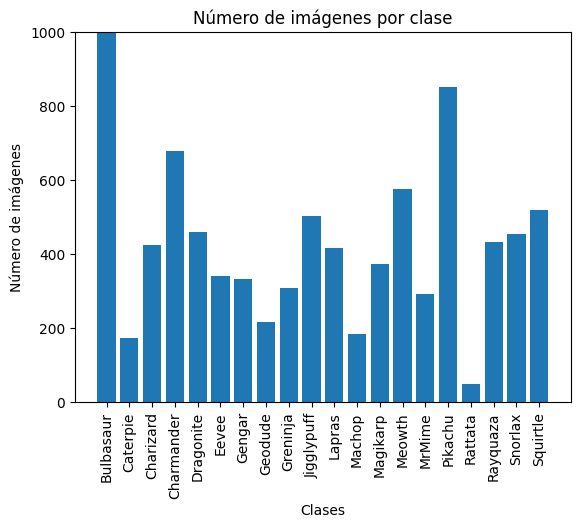

In [88]:
# Script para pre-visualizar las clases y el número de imágenes por clase (descomentar si se quiere probar)

# Importar librerías
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Seleccionamos la carpeta con las diferentes clases
path = 'pokemon'
clases = os.listdir(path) # Lista con las clases
print("Número total de clases: ", len(clases))

# Creamos un diccionario para almacenar el número de imágenes por clase
num_imagenes = {}
for elemento in clases:
    num_imagenes[elemento] = len(os.listdir(path+'/'+elemento))
    
print("Número de imágenes por clase: ", num_imagenes)

# Dibujamos la gráfica
plt.bar(range(len(num_imagenes)), list(num_imagenes.values()), align='center')
plt.xticks(range(len(num_imagenes)), list(num_imagenes.keys()))
# Hacemos bonita la gráfica
plt.ylim(0, 1000)
plt.xticks(rotation=90)
plt.ylabel('Número de imágenes')
plt.xlabel('Clases')
plt.title('Número de imágenes por clase')
# Mostramos la gráfica
plt.show()

Como dijimos anteriormente, a pesar de haber realizado una búsqueda masiva de imágenes, creemos que con apenas 400-1000 imágenes de cada especie no son suficientes, es por ello que vamos a utilizar técnicas como la rotación o volteo y así obtener, como mínimo, 2000 imágenes de cada especie. Para ello, podemos hacerlo de dos maneras:
1. Realizarlo directamente sobre el conjunto de imágenes.
2. Realizar la división del conjunto de imágenes en train y test y aplicar las técnicas de rotación y volteo sobre el conjunto de train.

Cualquiera de las opciones debería ser correcta, pero hemos decidido realizar la segunda opción, ya que así podemos usar directamente el conjunto de train a la hora de crear el modelo y no tendríamos que hacer una división posteriormente, es decir, nos ahorra un paso.

In [89]:
# Definimos el Conjunto X e Y, donde X son las imágenes y Y las clases

# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X = [] # Lista con las imágenes
Y = [] # Lista de etiquetas

# Recorremos las clases
for elemento in clases:
    # Recorremos las imágenes de cada clase
    for filename in os.listdir(path+'/'+elemento):
        # Añadimos la imagen a la lista X
        img = cv2.imread(path+'/'+elemento+'/'+filename)
        # Revisar que todas las imágenes tienen el mismo tamaño
        img = cv2.resize(img, (128,128))
        X.append(img)
        Y.append(elemento)
        
# Imprimimos la longitud de las listas
print("Número de imágenes: ", len(X))
print("Número de etiquetas: ", len(Y))

# Convertimos las listas a arrays de numpy
X = np.array(X)
Y = np.array(Y)
 
# División del conjunto de datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22, stratify=Y, shuffle=True)
print("Forma de X_train: ", X_train.shape)
print("Forma de X_test: ", X_test.shape)
print("Forma de Y_train: ", Y_train.shape)
print("Forma de Y_test: ", Y_test.shape)

# Codificación one hot de las etiquetas
encoder = LabelEncoder() 
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)
Y_train = to_categorical(Y_train, num_classes=20)
Y_test = to_categorical(Y_test, num_classes=20)


KeyboardInterrupt: 

Una vez hemos dividido el conjunto de imágenes, el próximo objetivo será generar muchas más imágenes, debido a que consideramos que las que tenemos son un número muy reducido (sobre todo en algunos casos los cuales tenemos menos de 400). Es por ello que vamos a usar técnicas como la rotación o modo espejo.

In [90]:
# Generamos 3000 imágenes de cada especie a partir de las 400-1000 que teníamos.

# Importamos librerías
from keras.preprocessing.image import ImageDataGenerator
import random

# Generador de imágenes
generador_imagenes = ImageDataGenerator(rotation_range=10, # Rotación aleatoria de la imagen
                                        width_shift_range=0.1, # Desplazamiento horizontal aleatorio
                                        height_shift_range=0.1, # Desplazamiento vertical aleatorio
                                        zoom_range=0.1, # Zoom aleatorio
                                        horizontal_flip=True) # Volteo horizontal

# Generamos 50 imágenes de cada imagen que tenemos y se guardan en la carpeta de la clase correspondiente
for elemento in clases:
    # Recorremos las imágenes de cada clase
    for filename in os.listdir(path+'/'+elemento):
        # Añadimos la imagen a la lista X
        img = cv2.imread(path+'/'+elemento+'/'+filename)
        # Revisar que todas las imágenes tienen el mismo tamaño
        img = cv2.resize(img, (128,128))
        # Cambiamos la dimensión de la imagen
        img = img.reshape([-1, 128, 128, 3])
        # Generamos las imágenes
        generador_imagenes.fit(img)
        imagenes_generadas = generador_imagenes.flow(img, batch_size=50, save_to_dir=path+'/'+elemento, save_prefix='aug', save_format='png')
        # Guardamos las imágenes
        for i in range(10):
            imagenes_generadas.next()
            
print('Imágenes generadas')

# Como todo este procedimiento se hace internamente, vamos a poner un pequeño fragmento de código que nos ayude a visualizar las imágenes generadas.
imagen_prueba = X_train[random.randint(0, len(X_train)-1)] # Seleccionamos una imagen aleatoria
imagen_prueba = imagen_prueba.reshape([-1, 128, 128, 3]) # Escalamos
imagen_prueba = imagen_prueba.astype('float32')/255 # Normalizamos

# Mostrar 20 imagenes generadas
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(generador_imagenes.flow(imagen_prueba)[0][0])
    plt.axis('off')
plt.show()


KeyboardInterrupt: 

Podemos ver que las imágenes están sacadas de la original (como el código indicaba que iba a hacer), pero con ligeros cambios como la rotación o el modo espejo. Y esta representación nos ayuda a ver que vamos a tener muchas más imágenes de las que teníamos en un principio.

### 4. Construcción del modelo 

Una vez tenemos ya el conjunto de datos dividido en train and test, todas las imágenes necesarias generadas y el dataset limpio y preparado, vamos a proceder a la creación del modelo CNN. <br>
Para ello seguiremos utilizando la librerçia Keras, la cual nos parece muy útil para realizar esta construcción y, además, contiene muchos ejemplos reales y en los cuales podemos orientarnos a la hora de realizar nuestro modelo. <br>
A la hora de su realización, podemos basarnos en varios tipos de enfoque: <br> 
1. Secuencial: se trata de una pila de capas de redes neuronales, en la cual cada capa tiene una entrada y una salida: https://keras.io/guides/sequential_model/ <br>
2. Funcional: se trata de un modelo más complejo, en el cual podemos tener varias entradas y salidas, y además podemos tener capas compartidas: https://keras.io/guides/functional_api/<br>

Nosotros hemos decidido utilizar el modelo secuencial, ya que consideramos que es más sencillo y más adecuado para nuestro problema dado que como lo que queremos hacer es que, dada una imagen se genere una interfaz que nos diga que Pokémon es, solo necesitamos de una entrada y una salida. <br>

In [ ]:
# Script de Construcción del modelo

# Importar librerías
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Definimos el modelo
modelo = Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same', kernel_initializer='he_normal'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))

modelo.add(Flatten())
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(20, activation='softmax'))

# Mostramos un resumen del modelo
modelo.summary()

# Printear todas las imagenes que usa el modelo (len)
print("Número de imágenes de entrenamiento: ", len(X_train))

# Checkpoint para guardar el modelo
checkpoint = ModelCheckpoint('modelo_pokemon.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Compilamos el modelo
modelo.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo con las imágenes generadas 
modelo = modelo.fit(generador_imagenes.flow(X_train, Y_train, batch_size=32), epochs=100, validation_data=(X_test, Y_test), callbacks=[checkpoint])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 61504)             0         
                                                                 
 dense_20 (Dense)            (None, 64)              

KeyboardInterrupt: 